# Laboratorio No. 2 - Regresión Lineal

Adjunto a este NoteBook encontrarán el archivo *Autos-csv* que contiene datos sobre automóviles de segunda mano.  El objetivo principal de este ejercicio es desarrollar un modelo que permita, en base a las características (features) que tiene el archivo, predecir el costo de un vehículo usado.

A diferencia de la mayoría de ejercicios, este archivo no ha sido depurado, es decir los datos son crudos (raw).  Esto quiere decir que antes de trabajar sobre un modelo predictivo, deben realizar el proceso total, desde limpieza de datos, exploración inicial, etc.

A continuación encontrarán que hay encabezados que bien podrían ayudarlos a desarrollar el código requerido.  Estos están a manera de sugerencia únicamente y Ustedes decidirán si los usan, modifican, eliminan, agregan a los mismos

## Importar las librerías relevantes

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

from quickda.clean_data import *


## Cargar los datos crudos

In [32]:
dataset = pd.read_csv('Autos.csv')

In [33]:
dataset = clean(dataset, method='standardize')

## Preprocesamiento

### Explorar las estadísticas descriptivas de las variables

In [34]:
dataset.head()

,brand,price,body,mileage,enginev,engine_type,registration,year,model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4345 non-null   object 
 1   price         4173 non-null   float64
 2   body          4345 non-null   object 
 3   mileage       4345 non-null   int64  
 4   enginev       4195 non-null   float64
 5   engine_type   4345 non-null   object 
 6   registration  4345 non-null   object 
 7   year          4345 non-null   int64  
 8   model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [36]:
dataset.describe()

,price,mileage,enginev,year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [37]:
dataset.columns

Index(['brand', 'price', 'body', 'mileage', 'enginev', 'engine_type',
       'registration', 'year', 'model'],
      dtype='object')

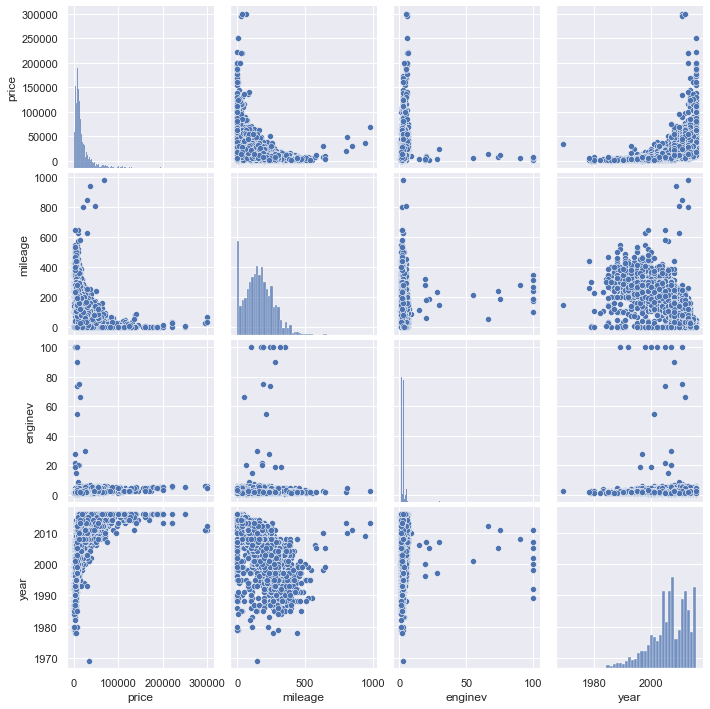

In [38]:
sns.pairplot(dataset)

In [39]:
report = ProfileReport(dataset)
report

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.36s/it]


/Users/douglasdeleon/Documents/DouglasJr/UVG/semestre8/Data_Science/Laboratorio_2/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='price'>

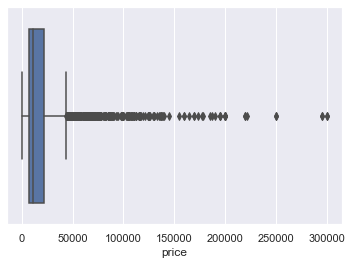

In [41]:
sns.boxplot(dataset['price'])

/Users/douglasdeleon/Documents/DouglasJr/UVG/semestre8/Data_Science/Laboratorio_2/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



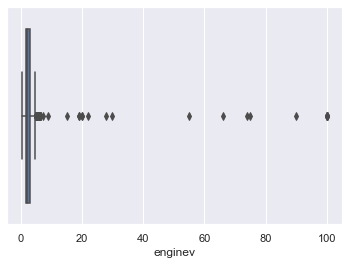

In [42]:
sns.boxplot(dataset['enginev']);

### Manejo de outliers

In [48]:
# Cambiamos valores de outliers en la variable enginev a 6.5 por juicio de experto

dataset['enginev'].loc[dataset['enginev'] > 6.5] = 6.5
dataset['enginev'].loc[dataset['enginev'] > 6.5]

Series([], Name: enginev, dtype: float64)

In [51]:
# Cambiamos valores de outliers en la variable price al percentil 95 (63,700)

dataset['price'].loc[dataset['price'] > 63700] = 63700
dataset['price'].loc[dataset['price'] > 63700]

Series([], Name: price, dtype: float64)

In [53]:
dataset.describe()

,price,mileage,enginev,year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,17271.515734,161.237284,2.504770,2006.550058
std,15891.453048,105.705797,1.020229,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,63700.000000,980.000000,6.500000,2016.000000


### Manejo de valores faltantes

In [54]:
# Reemplazamos datos nulos de variable enginev por la media

dataset['enginev'].fillna(dataset['enginev'].mean(), inplace=True)

In [55]:
# Reemplazamos datos nulos de variable price por la media

dataset['price'].fillna(dataset['price'].mean(), inplace=True)

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4345 non-null   object 
 1   price         4345 non-null   float64
 2   body          4345 non-null   object 
 3   mileage       4345 non-null   int64  
 4   enginev       4345 non-null   float64
 5   engine_type   4345 non-null   object 
 6   registration  4345 non-null   object 
 7   year          4345 non-null   int64  
 8   model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


### Determinación de las variables de interés

In [ ]:
columns = ['brand', 'price', 'body', 'millage', 'enginev', 'engine_type']

### Exploración de las Funciones de Distribución de Probabilidades (PDFs por sus siglas en inglés)

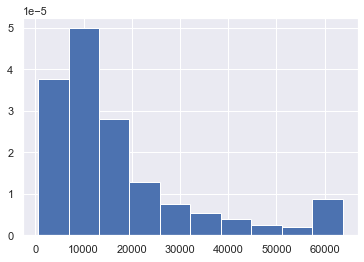

In [59]:
plt.hist(dataset['price'], density=True);

## Revisando los supuestos para OLS

### Revisaremos los supuestos:
* Linealidad
* Muestreo aleatorio
* La media condicional
* Multicolinearidad

## Relajamiento de los supuestos

### Linealidad

Nuestas variables independientes y la variable dependiente tienen una relación lineal.

### Muestreo aleatorio

Para nuestra selección de datos de entrenamiento y de prueba se hará una separación de forma aleatoria.

 ### Media condicional

 Asumimos que nuestra distribución de error no depende de la variable independiente (price).

### Multicolinealidad

Basándonos en nuestro reporte, las variables seleccionadas no están fuertemente correlacionadas y podemos asumir que no hay multicolinearidad.

## Crear variables comodín (Dummy)

### Re-ordenar un poco

## Modelo de regresión lineal

### Declarar las entradas y las metas

In [ ]:
X = casas[['brand', 'price', 'body', 'millage', 'enginev', 'engine_type']]
y = casas['price']

### Escalar (poner a escala) los datos

### Divisón del df completo en datos de entrenamiento y de prueba (Train Test Split)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Crear la regresión

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

### Encontrar R^2 del modelo

Nótese que este no es el R^2 ajustado.  En otras palabras hay que encontrar el R^2 ajustado para tener una medida más adecuada

### Fórmula para R^2 Ajustado

$R^2_{ajust.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

n = número de observaciones

p = número de predictores

### Encontrar los pesos (coeficientes) y el sesgo (intercepto)

## Prueba del modelo

### Conclusiones
